# <font color = 'orange'> 1. Introduction </font>


### 📌1.1 Importer les libraries

In [144]:
# Calculs & dataframes
import pandas as pd
import numpy as np
from math import pi

# ACP et K-means
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # pour centrer-réduire les données
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.pipeline import Pipeline



# Régression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.svm import SVC




# Librairies graphiques
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import itertools

#Evaluation
from sklearn.metrics import jaccard_score

#test statistique
from scipy import stats


### 📌1.2 Importer les DataFrame

In [145]:
df = pd.read_csv('notes.csv')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [146]:
df['is_genuine'] = np.where(df['is_genuine'] == True , 1, df['is_genuine'])
df['is_genuine'] = np.where(df['is_genuine'] == False , 0, df['is_genuine'])
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.67,103.74,103.70,4.01,2.87,113.29
2,1,171.83,103.76,103.76,4.40,2.88,113.84
3,1,171.80,103.78,103.65,3.73,3.12,113.63
4,1,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,0,172.11,104.23,104.45,5.24,3.58,111.78
166,0,173.01,104.59,104.31,5.04,3.05,110.91
167,0,172.47,104.27,104.10,4.88,3.33,110.68
168,0,171.82,103.97,103.88,4.73,3.55,111.87


# <font color = 'orange'> 2. Aperçu </font>


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    int32  
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: float64(6), int32(1)
memory usage: 8.8 KB


In [148]:
df.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,0.588235,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.493607,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,0.000000,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,0.000000,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,1.000000,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,1.000000,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,1.000000,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [149]:
df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

# <font color = 'orange'> 3. Mission 0 </font>



#### is_genuine	

In [150]:
false_per = len(df[df['is_genuine'] == 0]) / len(df) *100
print (" pourcentage de faux:",false_per)
True_per = len(df[df['is_genuine'] == 1]) / len(df) *100
print (" pourcentage de vrai:",True_per)

 pourcentage de faux: 41.17647058823529
 pourcentage de vrai: 58.82352941176471


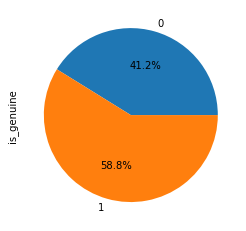

In [151]:
#groupby the data by delivery type
data = df.groupby("is_genuine")["is_genuine"].count()
data.plot.pie(autopct="%.1f%%");


#### diagona(la longueur du billet, en mm)

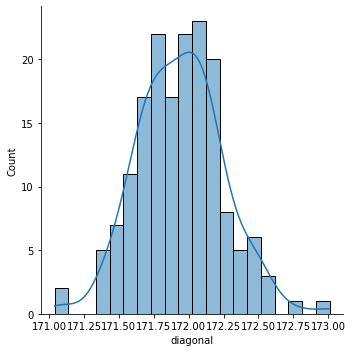

In [152]:
sns.displot(x="diagonal", data=df, bins=20, kde=True)

<AxesSubplot:xlabel='is_genuine', ylabel='diagonal'>

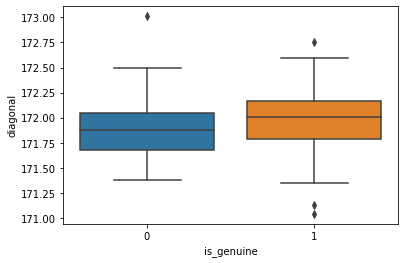

In [153]:
sns.boxplot(y="diagonal", x='is_genuine', data=df)

###### Test d'adéquation test de Kolmogorov-Smirnov(kstest)

In [154]:
from scipy.stats import norm
# Normal distribution avec mean et std defini
ideal_diagonal = norm.rvs(size=len(df.diagonal), loc=df.diagonal.mean(), scale=df.diagonal.std())

Text(0.5, 1.0, 'distribution diagonal vs distibution normal(mean et std similaires)')

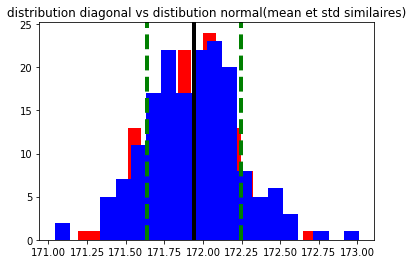

In [155]:
plt.hist(ideal_diagonal, color='red', bins=20)
plt.hist(df.diagonal, color='blue', bins=20)
plt.axvline(x=df.diagonal.mean(), color='black',  linewidth=4)
plt.axvline(x=df.diagonal.mean() + df.diagonal.std(), color='g', linestyle='--', linewidth=4)
plt.axvline(x=df.diagonal.mean() - df.diagonal.std(), color='g', linestyle='--', linewidth=4)
plt.title('distribution diagonal vs distibution normal(mean et std similaires)')

In [156]:
stats.kstest(df.diagonal, ideal_diagonal)

KstestResult(statistic=0.07058823529411765, pvalue=0.7923748394232968)

On ne peut pas donc rejeter l’hypothèse de normalité, H0 ✅

###### Test de comparaison de deux populations (dans le cas gaussien)

In [157]:
df_cluster_0 = df[df['is_genuine'] == 0]
df_cluster_1 = df[df['is_genuine'] == 1]

In [158]:
diagonal_0 = df_cluster_0['diagonal']
diagonal_1 = df_cluster_1['diagonal']

In [159]:
stats.ttest_ind(diagonal_0, diagonal_1)

Ttest_indResult(statistic=-1.8222865515506024, pvalue=0.07018967008887296)

On ne peut pas donc rejeter l’hypothèse d'egalité, H1 ✅

#### height_left (la hauteur du billet, mesurée sur le côté gauche, en mm)	

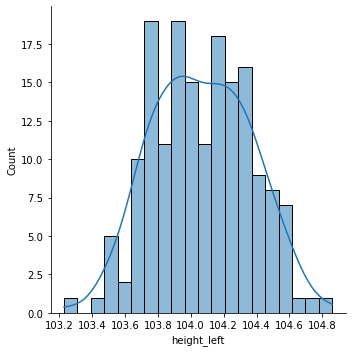

In [160]:
sns.displot(x="height_left", data=df, bins=20, kde=True)

<AxesSubplot:xlabel='is_genuine', ylabel='height_left'>

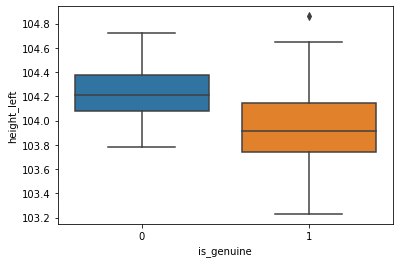

In [161]:
sns.boxplot(y="height_left", x='is_genuine', data=df)

###### Test d'adéquation test de Kolmogorov-Smirnov(kstest)

In [162]:
# Normal distribution avec mean et std defini
ideal_height_left = norm.rvs(size=len(df.height_left), loc=df.height_left.mean(), scale=df.height_left.std())

Text(0.5, 1.0, 'distribution height_left vs distibution normal(mean et std similaires)')

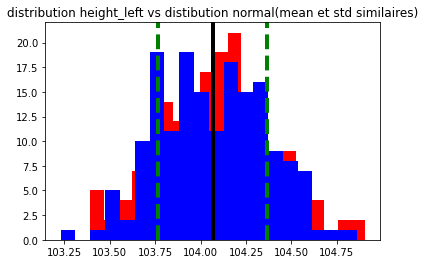

In [163]:
plt.hist(ideal_height_left, color='red', bins=20)
plt.hist(df.height_left, color='blue', bins=20)
plt.axvline(x=df.height_left.mean(), color='black',  linewidth=4)
plt.axvline(x=df.height_left.mean() + df.height_left.std(), color='g', linestyle='--', linewidth=4)
plt.axvline(x=df.height_left.mean() - df.height_left.std(), color='g', linestyle='--', linewidth=4)
plt.title('distribution height_left vs distibution normal(mean et std similaires)')

In [164]:
stats.kstest(df.height_left, ideal_height_left)

KstestResult(statistic=0.07058823529411765, pvalue=0.7923748394232968)

On ne peut pas donc rejeter l’hypothèse de normalité, H0 ✅

###### Test de comparaison de deux populations (dans le cas gaussien)

In [165]:
height_left_0 = df_cluster_0['height_left']
height_left_1 = df_cluster_1['height_left']

In [166]:
stats.ttest_ind(height_left_0, height_left_1)

Ttest_indResult(statistic=6.746974258787215, pvalue=2.3342002888499904e-10)

On peut donc rejeter l’hypothèse d'egalité, H1 ✅

#### height_right (La hauteur du billet, mesurée sur le côté droit, en mm)

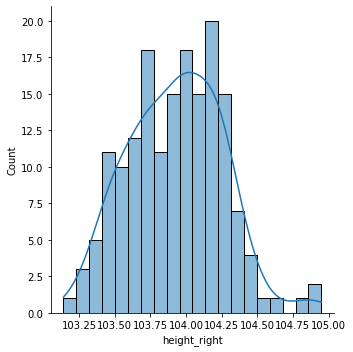

In [167]:
sns.displot(x="height_right", data=df, bins=20, kde=True)

<AxesSubplot:xlabel='is_genuine', ylabel='height_right'>

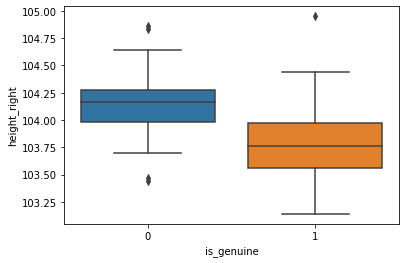

In [168]:
sns.boxplot(y="height_right", x='is_genuine', data=df)

###### Test d'adéquation test de Kolmogorov-Smirnov(kstest)

In [169]:
# Normal distribution avec mean et std defini
ideal_height_right = norm.rvs(size=len(df.height_right), loc=df.height_right.mean(), scale=df.height_right.std())

Text(0.5, 1.0, 'distribution height_right vs distibution normal(mean et std similaires)')

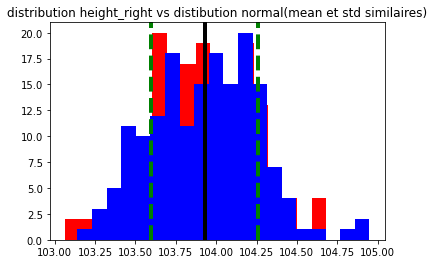

In [170]:
plt.hist(ideal_height_right, color='red', bins=20)
plt.hist(df.height_right, color='blue', bins=20)
plt.axvline(x=df.height_right.mean(), color='black',  linewidth=4)
plt.axvline(x=df.height_right.mean() + df.height_right.std(), color='g', linestyle='--', linewidth=4)
plt.axvline(x=df.height_right.mean() - df.height_right.std(), color='g', linestyle='--', linewidth=4)
plt.title('distribution height_right vs distibution normal(mean et std similaires)')

In [171]:
stats.kstest(df.height_right, ideal_height_right)

KstestResult(statistic=0.07058823529411765, pvalue=0.7923748394232968)

On ne peut pas donc rejeter l’hypothèse de normalité, H0 ✅

###### Test de comparaison de deux populations (dans le cas gaussien)

In [172]:
height_right_0 = df_cluster_0['height_right']
height_right_1 = df_cluster_1['height_right']

In [173]:
stats.ttest_ind(height_right_0, height_right_1)

Ttest_indResult(statistic=8.564989194564754, pvalue=6.665246409290165e-15)

On peut donc rejeter l’hypothèse d'egalité, H1 ✅

#### margin_low (la marge entre le bord supérieur du billet et l'image de celui-ci en mm)

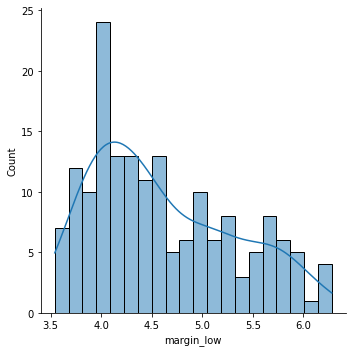

In [174]:
sns.displot(x="margin_low", data=df, bins=20, kde=True)

<AxesSubplot:xlabel='is_genuine', ylabel='margin_low'>

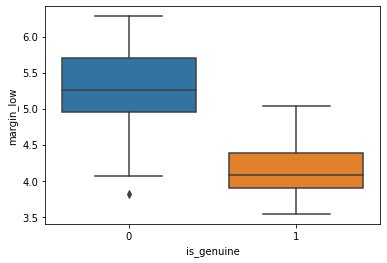

In [175]:
sns.boxplot(y="margin_low", x='is_genuine', data=df)

###### Test d'adéquation test de Kolmogorov-Smirnov(kstest)

In [176]:
# Normal distribution avec mean et std defini
ideal_margin_low = norm.rvs(size=len(df.margin_low), loc=df.margin_low.mean(), scale=df.margin_low.std())

Text(0.5, 1.0, 'distribution margin_low vs distibution normal(mean et std similaires)')

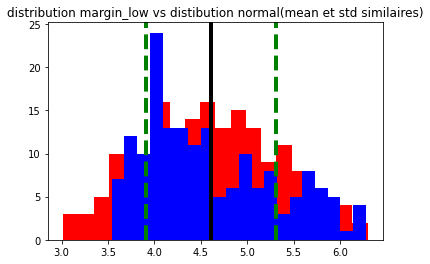

In [177]:
plt.hist(ideal_margin_low, color='red', bins=20)
plt.hist(df.margin_low, color='blue', bins=20)
plt.axvline(x=df.margin_low.mean(), color='black',  linewidth=4)
plt.axvline(x=df.margin_low.mean() + df.margin_low.std(), color='g', linestyle='--', linewidth=4)
plt.axvline(x=df.margin_low.mean() - df.margin_low.std(), color='g', linestyle='--', linewidth=4)
plt.title('distribution margin_low vs distibution normal(mean et std similaires)')

In [178]:
stats.kstest(df.margin_low, ideal_margin_low)

KstestResult(statistic=0.12352941176470589, pvalue=0.14952060600789593)

On ne peut pas donc rejeter l’hypothèse de normalité, H0 ✅

###### Test de comparaison de deux populations (dans le cas gaussien)

In [179]:
margin_low_0 = df_cluster_0['margin_low']
margin_low_1 = df_cluster_1['margin_low']

In [180]:
stats.ttest_ind(margin_low_0, margin_low_1)

Ttest_indResult(statistic=17.288623485750918, pvalue=3.940145276272617e-39)

On peut donc rejeter l’hypothèse d'egalité, H1 ✅

#### margin_up (la marge entre le bord inférieur du billet et l'image de celui-ci en mm)

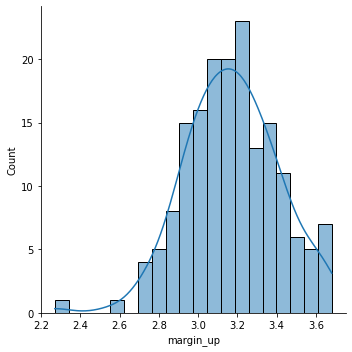

In [181]:
sns.displot(x="margin_up", data=df, bins=20, kde=True)

<AxesSubplot:xlabel='is_genuine', ylabel='margin_up'>

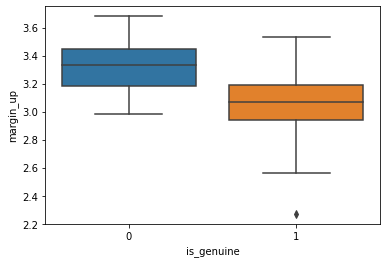

In [182]:
sns.boxplot(y="margin_up", x='is_genuine', data=df)

###### Test d'adéquation test de Kolmogorov-Smirnov(kstest)

In [183]:
# Normal distribution avec mean et std defini
ideal_margin_up = norm.rvs(size=len(df.margin_up), loc=df.margin_up.mean(), scale=df.margin_up.std())

Text(0.5, 1.0, 'distribution margin_up vs distibution normal(mean et std similaires)')

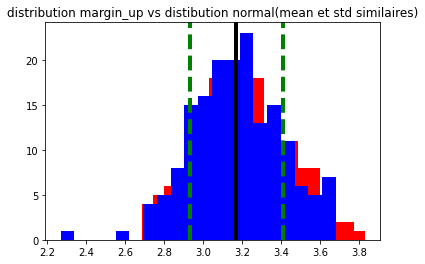

In [184]:
plt.hist(ideal_margin_up, color='red', bins=20)
plt.hist(df.margin_up, color='blue', bins=20)
plt.axvline(x=df.margin_up.mean(), color='black',  linewidth=4)
plt.axvline(x=df.margin_up.mean() + df.margin_up.std(), color='g', linestyle='--', linewidth=4)
plt.axvline(x=df.margin_up.mean() - df.margin_up.std(), color='g', linestyle='--', linewidth=4)
plt.title('distribution margin_up vs distibution normal(mean et std similaires)')

In [185]:
stats.kstest(df.margin_up, ideal_margin_up)

KstestResult(statistic=0.10588235294117647, pvalue=0.29704886740105396)

On ne peut pas donc rejeter l’hypothèse de normalité, H0 ✅

###### Test de comparaison de deux populations (dans le cas gaussien)

In [186]:
margin_up_0 = df_cluster_0['margin_up']
margin_up_1 = df_cluster_1['margin_up']

In [187]:
stats.ttest_ind(margin_up_0, margin_up_1)

Ttest_indResult(statistic=9.295866009945723, pvalue=7.567386063614238e-17)

On peut donc rejeter l’hypothèse d'egalité, H1 ✅

#### length (la diagonale du billet en mm)

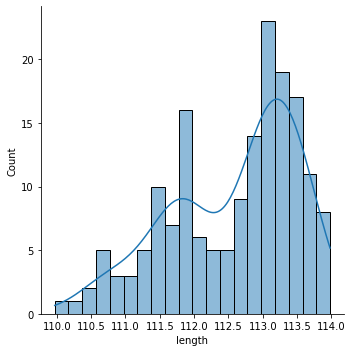

In [188]:
sns.displot(x="length", data=df, bins=20, kde=True)

<AxesSubplot:xlabel='is_genuine', ylabel='length'>

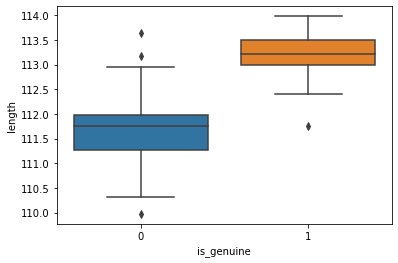

In [189]:
sns.boxplot(y="length", x='is_genuine', data=df)

###### Test d'adéquation test de Kolmogorov-Smirnov(kstest)

In [190]:
# Normal distribution avec mean et std defini
ideal_length = norm.rvs(size=len(df.length), loc=df.length.mean(), scale=df.length.std())

Text(0.5, 1.0, 'distribution length vs distibution normal(mean et std similaires)')

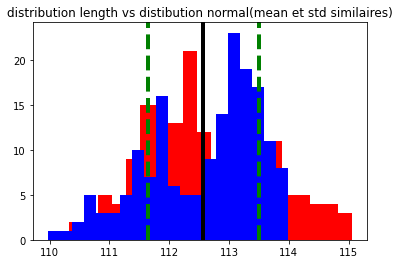

In [191]:
plt.hist(ideal_length, color='red', bins=20)
plt.hist(df.length, color='blue', bins=20)
plt.axvline(x=df.length.mean(), color='black',  linewidth=4)
plt.axvline(x=df.length.mean() + df.length.std(), color='g', linestyle='--', linewidth=4)
plt.axvline(x=df.length.mean() - df.length.std(), color='g', linestyle='--', linewidth=4)
plt.title('distribution length vs distibution normal(mean et std similaires)')

In [192]:
stats.kstest(df.length, ideal_length)

KstestResult(statistic=0.14705882352941177, pvalue=0.050499374400233436)

On peut donc rejeter l’hypothèse de normalité, H1 ✅

###### Test de comparaison de deux populations (dans le cas gaussien)

In [193]:
length_0 = df_cluster_0['length']
length_1 = df_cluster_1['length']

In [194]:
stats.ttest_ind(length_0, length_1)

Ttest_indResult(statistic=-18.975090930566722, pvalue=1.2348226459862946e-43)

On peut donc rejeter l’hypothèse d'egalité, H1 ✅

#### Pairplot 

In [195]:
X = df[['diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length']]

In [196]:
X.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.67,103.74,103.70,4.01,2.87,113.29
2,171.83,103.76,103.76,4.40,2.88,113.84
3,171.80,103.78,103.65,3.73,3.12,113.63
4,172.05,103.70,103.75,5.04,2.27,113.55


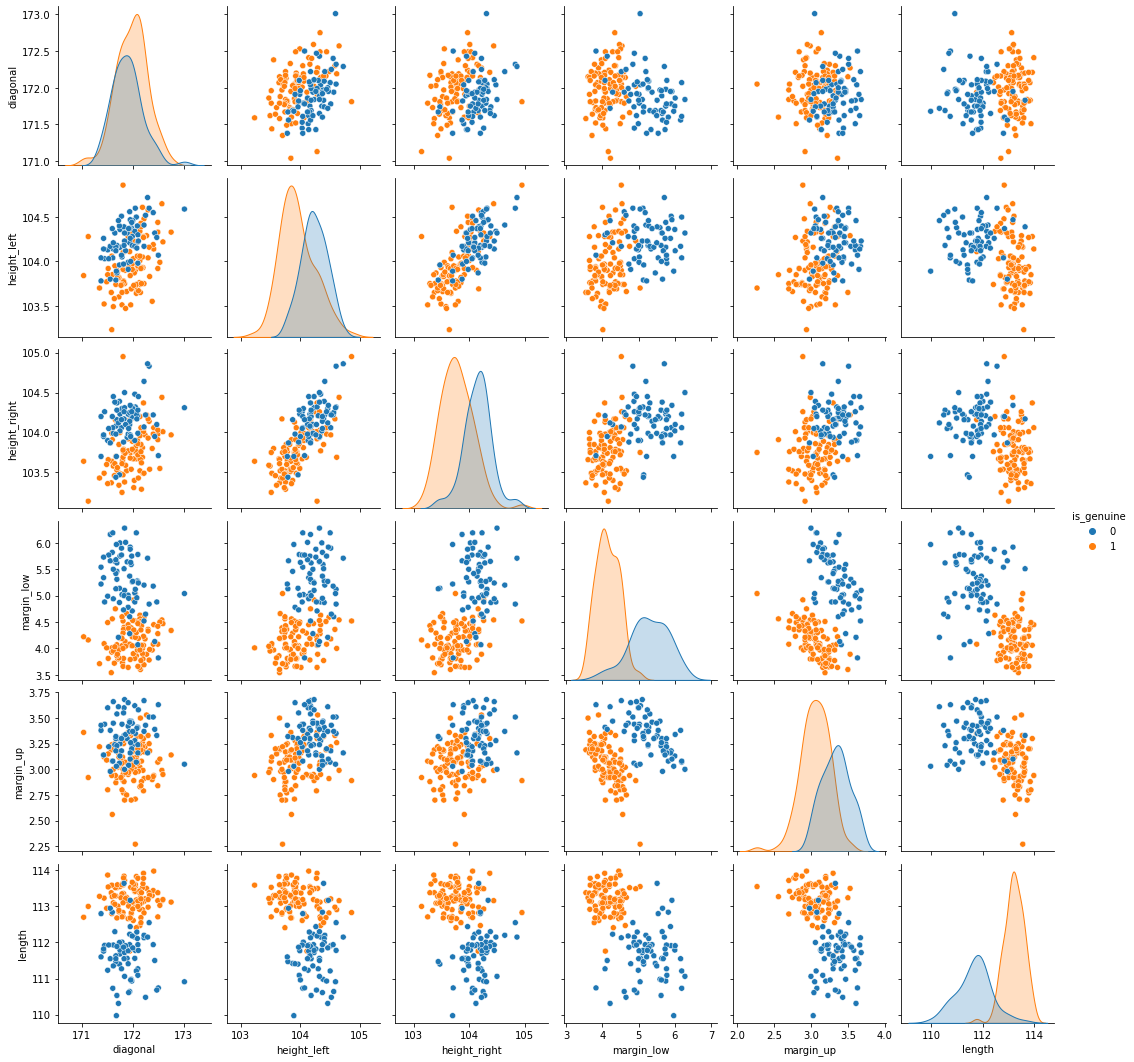

In [197]:
sns.pairplot(df, hue='is_genuine')

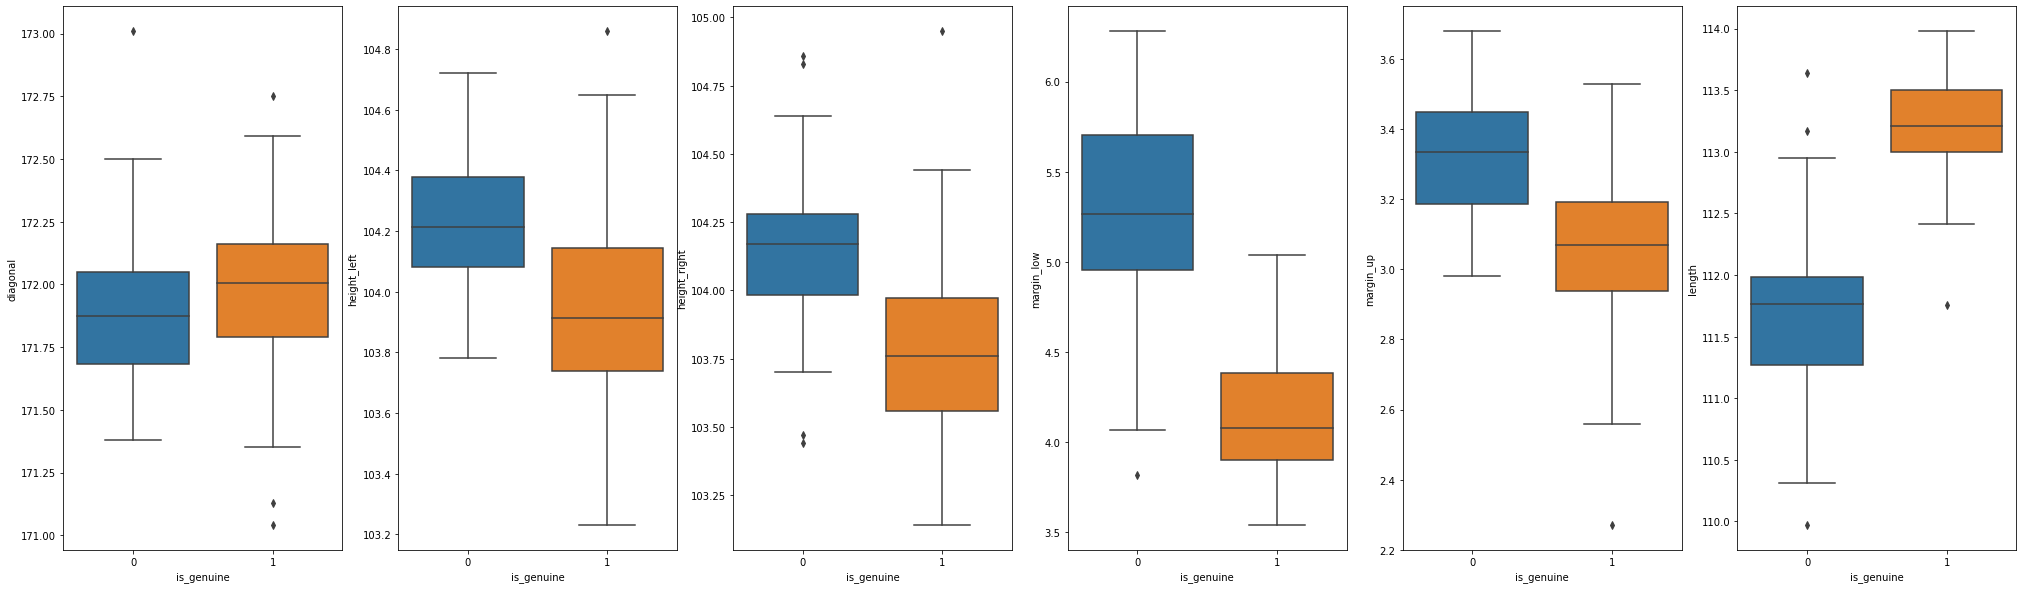

In [198]:
fig, axs= plt.subplots(1, len(X.columns), figsize=(35,10) )
for i,col in enumerate(X.columns):
    sns.boxplot(y=col, x='is_genuine', data=df, ax=axs[i])    

In [199]:
#sns.clustermap(X.corr())

In [200]:
X.corr().style.highlight_max(axis=1, props='color:white; font-weight:bold; background-color:darkblue;')

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.319584,0.220418,-0.181020,-0.027366,0.080295
height_left,0.319584,1.000000,0.734390,0.424530,0.324788,-0.421387
height_right,0.220418,0.734390,1.000000,0.509375,0.366918,-0.417021
margin_low,-0.181020,0.424530,0.509375,1.000000,0.171113,-0.637352
margin_up,-0.027366,0.324788,0.366918,0.171113,1.000000,-0.525284
length,0.080295,-0.421387,-0.417021,-0.637352,-0.525284,1.000000


In [201]:
#X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X_scaled.columns)
#mask = np.triu(np.ones_like(X_scaled.corr(), dtype=bool))
#sns.heatmap(X_scaled.corr(), cmap="coolwarm", mask=mask, linewidths=.1, annot=True, square=True)

# <font color = 'orange'> 4. Mission 1 : ACP </font>


In [202]:
from matplotlib.collections import LineCollection

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

#### Analyser de l'éboulis des valeurs propres

In [203]:
# choix du nombre de composantes à calculer
n_comp_1 = 6

# selection des colonnes à prendre en compte dans l'ACP
df_pca = df[['diagonal', 'height_left', 'height_right', 'margin_low',  'margin_up', 'length']]

In [204]:
X_1 = df_pca.values

features = df[['diagonal', 'height_left', 'height_right', 'margin_low',  'margin_up', 'length']].columns

In [205]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X_1)
scaled_data = std_scale.transform(X_1)

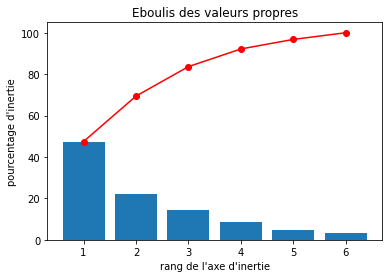

[0.47 0.22 0.14 0.09 0.05 0.03]
[0.47 0.69 0.84 0.92 0.97 1.  ]


In [206]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp_1)
pca.fit(scaled_data)

# Eboulis des valeurs propres
display_scree_plot(pca)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

#### Représentation des variables par le cercle des corrélations

In [207]:
pcs = pca.components_
pcs

array([[ 0.07,  0.48,  0.49,  0.43,  0.35, -0.47],
       [ 0.78,  0.34,  0.24, -0.32, -0.14,  0.31],
       [-0.09,  0.12,  0.15,  0.51, -0.82,  0.13],
       [-0.56,  0.28,  0.46, -0.23,  0.14,  0.57],
       [-0.23,  0.72, -0.49, -0.31, -0.19, -0.25],
       [ 0.12,  0.23, -0.48,  0.55,  0.35,  0.52]])

In [208]:
#Trouver les variables plus impactants
importantVariable = (abs(np.array(pcs))).sum(axis=0)
importantVariable

array([1.85, 2.16, 2.31, 2.35, 2.  , 2.26])

In [209]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

pca_data = pca.transform(scaled_data)

pca_df = pd.DataFrame(pca_data, index = df.index, columns = labels )
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,2.153639,1.599709,1.787451,2.433465,0.699690,-1.267702
1,-2.110416,-0.526039,0.542563,0.344550,0.067440,-0.544601
2,-1.973152,-0.048102,0.858716,0.374812,-0.424886,0.080487
3,-2.059795,-0.089105,-0.531529,0.519548,-0.033267,-0.038261
4,-2.403180,0.412170,3.319507,-0.837043,-0.420151,-0.445099


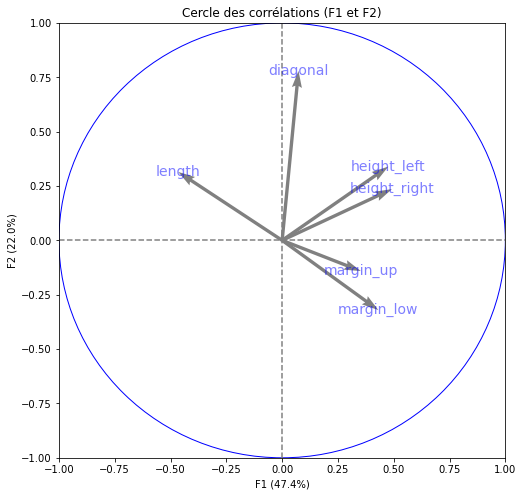

In [210]:
display_circles(pcs, 2, pca, [(0,1)], labels =np.array(features))

In [211]:
n = 6
pca_loading = pca.components_.T * np.sqrt(pca.explained_variance_)
pca_loading_matrix = pd.DataFrame(pca_loading, columns = ['PC{}'.format(i) for i in range(1, n+1)], index= df_pca.columns)
pca_loading_matrix['Highest_loading'] = pca_loading_matrix.idxmax(axis=1)
pca_loading_matrix = pca_loading_matrix.sort_values('Highest_loading')
pca_loading_matrix = pca_loading_matrix[['PC1', 'PC2', 'Highest_loading']]
pca_loading_matrix

,PC1,PC2,Highest_loading
height_left,0.804670,0.390539,PC1
height_right,0.832286,0.271153,PC1
margin_low,0.729406,-0.368997,PC1
margin_up,0.596587,-0.162455,PC1
diagonal,0.124000,0.897507,PC2
length,-0.787529,0.362089,PC4


Text(0.5, 1.0, 'Matrice de corrélation entre variables et composantes')

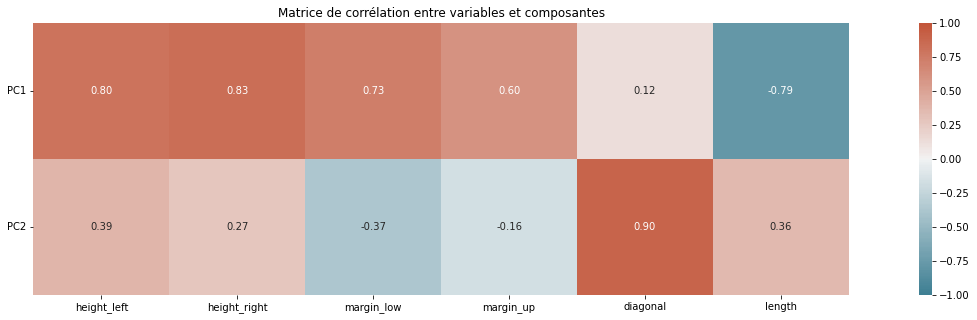

In [212]:
plt.figure(figsize=(25, 5))
ax = sns.heatmap(pca_loading_matrix.drop('Highest_loading', axis=1).T,
                vmin = -1 , vmax= 1 , center= 0,
                  cmap = sns.diverging_palette(220, 20, n = 200),
                  square = True, annot = True, fmt = '.2f')

ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
plt.title('Matrice de corrélation entre variables et composantes')

#### Représentation des individus par les plans factoriels

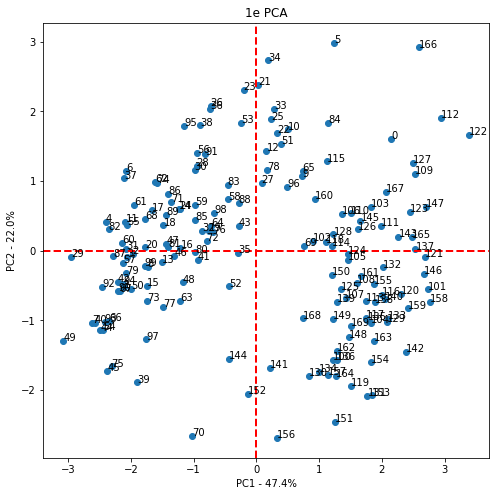

In [213]:
plt.figure(figsize=(8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('1e PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in df_pca.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample],  pca_df.PC2.loc[sample]) )
    
plt.axvline(x=0, linewidth=2, color='red', linestyle='--')
plt.axhline(y=0, linewidth=2, color='red', linestyle='--')

    
plt.show()  

In [214]:
pca_df_TF =  pca_df.join(df[['is_genuine']])
pca_df_TF

,PC1,PC2,PC3,PC4,PC5,PC6,is_genuine
0,2.153639,1.599709,1.787451,2.433465,0.699690,-1.267702,1
1,-2.110416,-0.526039,0.542563,0.344550,0.067440,-0.544601,1
2,-1.973152,-0.048102,0.858716,0.374812,-0.424886,0.080487,1
3,-2.059795,-0.089105,-0.531529,0.519548,-0.033267,-0.038261,1
4,-2.403180,0.412170,3.319507,-0.837043,-0.420151,-0.445099,1
...,...,...,...,...,...,...,...
165,2.478626,0.189974,-0.814598,0.107861,-0.899828,0.093078,0
166,2.585331,2.914472,0.586789,-2.183704,0.274577,-0.509206,0
167,2.067245,0.845602,-0.610282,-1.714172,0.116958,-0.504338,0
168,0.739257,-0.972965,-1.359772,-0.191736,-0.243557,0.211429,0


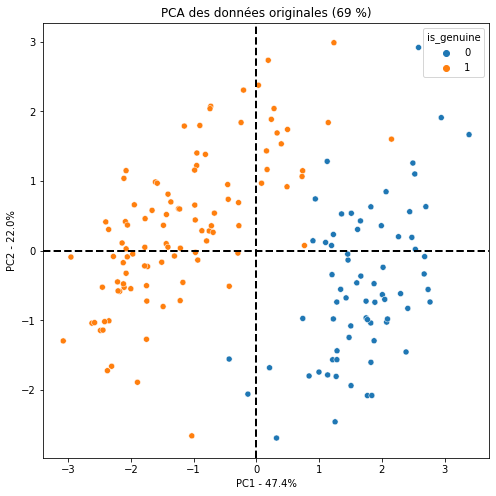

In [215]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=pca_df_TF, x="PC1", y="PC2", hue="is_genuine")
plt.title('PCA des données originales (69 %)')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

plt.axvline(x=0, linewidth=2, color='black', linestyle='--')
plt.axhline(y=0, linewidth=2, color='black', linestyle='--')

plt.show()

### Version 2 ( sans le variable diagonal)

In [216]:
# choix du nombre de composantes à calculer
n_comp_2 = 4

# selection des colonnes à prendre en compte dans l'ACP
df_pca_2 = df[['height_left', 'height_right', 'margin_low',  'margin_up', 'length']]

In [217]:
X_2 = df_pca_2.values

features_2 = df[['height_left', 'height_right', 'margin_low',  'margin_up', 'length']].columns

In [218]:
# Centrage et Réduction
std_scale_2 = preprocessing.StandardScaler().fit(X_2)
scaled_data_2 = std_scale_2.transform(X_2)

[0.57 0.17 0.16 0.06]
[0.57 0.74 0.9  0.96]


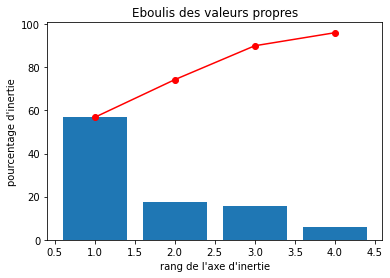

In [219]:
# Calcul des composantes principales
pca_2 = decomposition.PCA(n_components=n_comp_2)
pca_2.fit(scaled_data_2)

print(pca_2.explained_variance_ratio_)
print(pca_2.explained_variance_ratio_.cumsum())


# Eboulis des valeurs propres
display_scree_plot(pca_2)

#### Représentation des variables par le cercle des corrélations

In [220]:
pcs_2 = pca_2.components_
pcs_2

array([[ 0.47,  0.49,  0.44,  0.36, -0.47],
       [ 0.36,  0.34,  0.24, -0.76,  0.35],
       [-0.41, -0.34,  0.64, -0.35, -0.43],
       [ 0.6 , -0.52, -0.33, -0.26, -0.45]])

In [221]:
per_var_2 = np.round(pca_2.explained_variance_ratio_*100, decimals=1)
labels_2 = ['PC' + str(x) for x in range(1, len(per_var_2)+1)]

pca_data_2 = pca_2.transform(scaled_data_2)

pca_df_2 = pd.DataFrame(pca_data_2, index = df.index, columns = labels_2 )
pca_df_2.head()

,PC1,PC2,PC3,PC4
0,2.143117,2.982124,-1.947397,0.221265
1,-2.051636,0.411908,0.249463,-0.029359
2,-1.953085,0.808068,0.247236,-0.544796
3,-2.035150,-0.359593,-0.537573,-0.181211
4,-2.432789,2.792122,1.962433,-0.133434


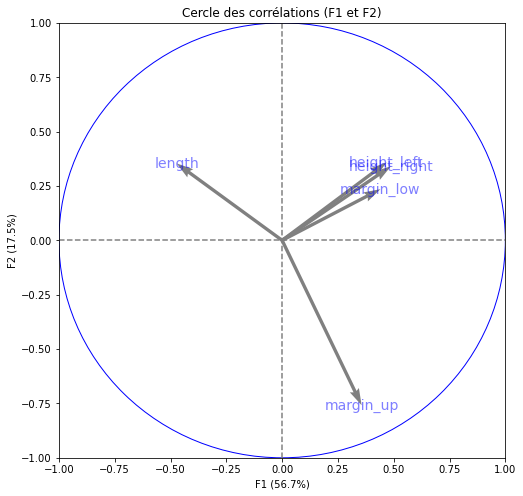

In [222]:
display_circles(pcs_2, 2, pca_2, [(0,1)], labels =np.array(features_2))

In [223]:
n = 4
pca_loading_2 = pca_2.components_.T * np.sqrt(pca_2.explained_variance_)
pca_loading_matrix_2 = pd.DataFrame(pca_loading_2, columns = ['PC{}'.format(i) for i in range(1, n+1)], index= df_pca_2.columns)
pca_loading_matrix_2['Highest_loading'] = pca_loading_matrix_2.idxmax(axis=1)
pca_loading_matrix_2 = pca_loading_matrix_2.sort_values('Highest_loading')
pca_loading_matrix_2 = pca_loading_matrix_2[['PC1', 'PC2', 'Highest_loading']]
pca_loading_matrix_2

,PC1,PC2,Highest_loading
height_left,0.790267,0.335638,PC1
height_right,0.823301,0.319552,PC1
margin_low,0.743694,0.220639,PC1
margin_up,0.601523,-0.710930,PC1
length,-0.798053,0.331781,PC2


[Text(0, 0.5, 'PC1'), Text(0, 1.5, 'PC2')]

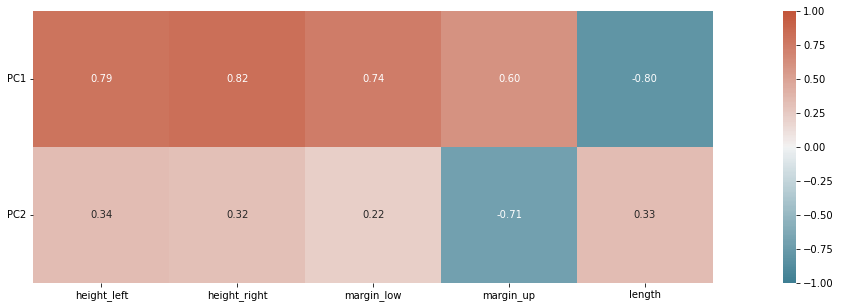

In [224]:
plt.figure(figsize=(25, 5))
ax = sns.heatmap(pca_loading_matrix_2.drop('Highest_loading', axis=1).T,
                vmin = -1 , vmax= 1 , center= 0,
                  cmap = sns.diverging_palette(220, 20, n = 200),
                  square = True, annot = True, fmt = '.2f')

ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

#### Représentation des individus par les plans factoriels

In [225]:
pca_df_TF_2 =  pca_df_2.join(df[['is_genuine']])
pca_df_TF_2.head()

,PC1,PC2,PC3,PC4,is_genuine
0,2.143117,2.982124,-1.947397,0.221265,1
1,-2.051636,0.411908,0.249463,-0.029359,1
2,-1.953085,0.808068,0.247236,-0.544796,1
3,-2.035150,-0.359593,-0.537573,-0.181211,1
4,-2.432789,2.792122,1.962433,-0.133434,1


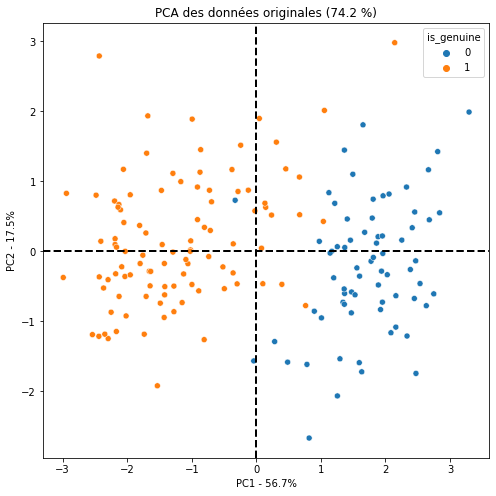

In [226]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=pca_df_TF_2, x="PC1", y="PC2", hue="is_genuine")
plt.title('PCA des données originales (74.2 %)')
plt.xlabel('PC1 - {0}%'.format(per_var_2[0]))
plt.ylabel('PC2 - {0}%'.format(per_var_2[1]))

plt.axvline(x=0, linewidth=2, color='black', linestyle='--')
plt.axhline(y=0, linewidth=2, color='black', linestyle='--')

plt.show()

# <font color = 'orange'> 5. Mission 2 : méthode des K-means </font>


In [227]:
X.columns

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [228]:
columns = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
df_scaled = pd.DataFrame(scaled_data, columns = columns )
df_scaled.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777


In [229]:
#KMeans?

In [230]:
# Clustering par K-means
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter = 300, random_state=4).fit(df_scaled.values)
kmeans_labels = kmeans.labels_

In [231]:
silhouette_score = silhouette_score(df_scaled,kmeans_labels )
print(f'Silhouette Score(n=2): {silhouette_score}')

Silhouette Score(n=2): 0.35143612792360984


In [232]:
df_scaled["Kmeans_clusters"] = kmeans_labels
df_scaled.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,Kmeans_clusters
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633,0
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697,1
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405,1
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571,1
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777,1


In [233]:
kmeans.cluster_centers_

array([[-0.06,  0.65,  0.72,  0.82,  0.64, -0.88],
       [ 0.05, -0.54, -0.6 , -0.68, -0.53,  0.73]])

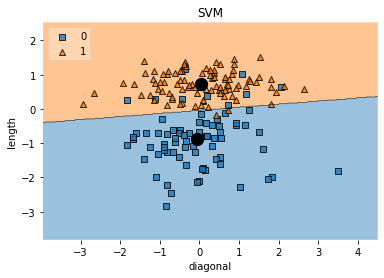

In [234]:
# Récupération des clusters attribués à chaque individu
#plt.figure(figsize=(10,8))
#sns.scatterplot(x='kcal_hab', y ='kprot_hab', data=X_km_1, hue='clusters',ci=None, palette=['green','orange','brown','dodgerblue','red'], legend='full') 

Xp1 = df_scaled[['diagonal', 'length' ]].values
yp1 = df_scaled.Kmeans_clusters.values

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(Xp1, yp1)


# Plotting decision regions
plot_decision_regions(Xp1, yp1, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('diagonal')
plt.ylabel('length')
plt.title('SVM')


plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 5], s=150, c='black')
plt.show()

In [235]:
df_pca_km = pca_df_TF[['PC1', 'PC2']]
df_pca_km['clusters'] = df_scaled['Kmeans_clusters']
df_pca_km.head()

C:\Users\pouri\AppData\Local\Temp/ipykernel_19448/2022122166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca_km['clusters'] = df_scaled['Kmeans_clusters']


,PC1,PC2,clusters
0,2.153639,1.599709,0
1,-2.110416,-0.526039,1
2,-1.973152,-0.048102,1
3,-2.059795,-0.089105,1
4,-2.403180,0.412170,1


In [236]:
kmeans_pca = KMeans(n_clusters=2, init='k-means++', max_iter = 300, random_state=4).fit(df_pca_km.values)
kmeans_pca

KMeans(n_clusters=2, random_state=4)

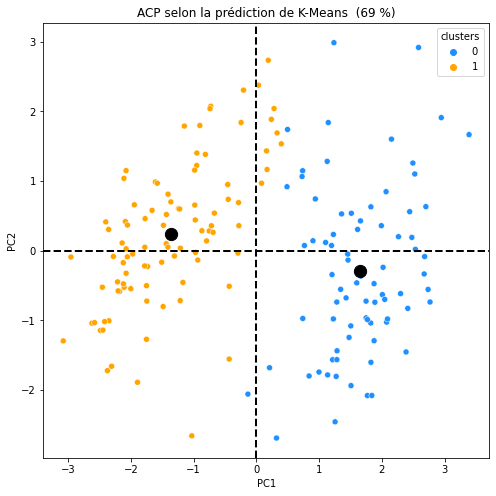

In [237]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df_pca_km.PC1, y=df_pca_km.PC2, hue=df_pca_km.clusters, ci=None, palette=['dodgerblue','orange'], legend='full' )
plt.title("ACP selon la prédiction de K-Means  (69 %)")

plt.axvline(x=0, linewidth=2, color='black', linestyle='--')
plt.axhline(y=0, linewidth=2, color='black', linestyle='--')

plt.scatter(kmeans_pca.cluster_centers_[:, 0],kmeans_pca.cluster_centers_[:, 1], s=150, c='black')
plt.show()

plt.show()

#### Validation

In [238]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        70
           1       0.99      0.92      0.95       100

    accuracy                           0.95       170
   macro avg       0.94      0.95      0.95       170
weighted avg       0.95      0.95      0.95       170

Confusion matrix, without normalization
[[69  1]
 [ 8 92]]


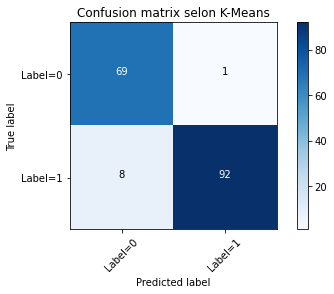

In [239]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df.is_genuine, df_scaled.Kmeans_clusters, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(df.is_genuine, df_scaled.Kmeans_clusters))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Label=0','Label=1'],normalize= False,  title='Confusion matrix selon K-Means')

In [240]:
from sklearn.metrics import f1_score
f1_score(df.is_genuine, df_scaled.Kmeans_clusters, average='weighted') 

0.9473592545826621

# <font color = 'orange'> 6. Mission 3 : Classification </font>


## 6.1 Régression logistique

#### 📌6.1.1 Réalisation du modèle

In [241]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [242]:
X_LR = np.asarray(df[['height_left', 'height_right', 'margin_low',
                   'margin_up', 'length']])
X_LR[:5]

array([[104.86, 104.95,   4.52,   2.89, 112.83],
       [103.74, 103.7 ,   4.01,   2.87, 113.29],
       [103.76, 103.76,   4.4 ,   2.88, 113.84],
       [103.78, 103.65,   3.73,   3.12, 113.63],
       [103.7 , 103.75,   5.04,   2.27, 113.55]])

In [243]:
y_LR = np.asarray(df[['is_genuine']])
y_LR[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

Train/Test dataset

In [244]:
X_train, X_test, y_train, y_test = train_test_split( X_LR, y_LR, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (136, 5) (136, 1)
Test set: (34, 5) (34, 1)


Modeling

In [245]:
LR = LogisticRegression(random_state = 42).fit(X_train,y_train)
LR

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pouri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [246]:
LR.score(X_train,y_train)

0.9926470588235294

In [247]:
LR.score(X_test,y_test)

0.9705882352941176

Data Scaled

In [248]:
#LogisticRegression?

In [249]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression(random_state = 42))
    
])

pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', LogisticRegression(random_state=42))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': LogisticRegression(random_state=42),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': 42,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [250]:
pipe.fit(X_train, y_train )

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scale', StandardScaler()),
                ('model', LogisticRegression(random_state=42))])

In [251]:
pipe.score(X_train, y_train)

1.0

In [252]:
pipe.score(X_test, y_test)

0.9705882352941176

#### données d'apprentissage

In [253]:
#Prediction de test set
ypred_train = LR.predict(X_train)
print('y_pred =',ypred_train)
print('y_test =',(y_train).reshape(1,-1))

y_pred = [0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0]
y_test = [[0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1
  1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1
  1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1
  0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0]]


predict_proba

In [254]:
ypred_train_prob = LR.predict_proba(X_train)

print(ypred_train)
print(ypred_train_prob)
print("renvoie des estimations pour toutes les classes, classées par l'étiquette des classes. Ainsi, la première colonne est la probabilité de la classe 0, P(Y=0|X), et la deuxième colonne est la probabilité de la classe 1, P(Y=1|X) :")

[0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0]
[[9.70e-01 2.99e-02]
 [9.63e-01 3.73e-02]
 [3.10e-03 9.97e-01]
 [7.49e-03 9.93e-01]
 [8.50e-01 1.50e-01]
 [9.98e-01 1.88e-03]
 [8.77e-01 1.23e-01]
 [7.73e-02 9.23e-01]
 [8.36e-02 9.16e-01]
 [9.87e-01 1.31e-02]
 [4.46e-03 9.96e-01]
 [2.47e-03 9.98e-01]
 [1.69e-01 8.31e-01]
 [1.02e-01 8.98e-01]
 [9.96e-01 4.32e-03]
 [2.25e-01 7.75e-01]
 [3.81e-02 9.62e-01]
 [1.16e-02 9.88e-01]
 [3.60e-02 9.64e-01]
 [9.98e-01 2.21e-03]
 [9.92e-01 8.14e-03]
 [9.99e-01 6.05e-04]
 [1.12e-02 9.89e-01]
 [9.99e-01 1.44e-03]
 [6.80e-02 9.32e-01]
 [5.21e-01 4.79e-01]
 [6.86e-01 3.14e-01]
 [7.69e-03 9.92e-01]
 [8.29e-01 1.71e-01]
 [4.36e-02 9.56e-01]
 [2.99e-02 9.70e-01]
 [5.19e-02 9.48e-01]
 [3.88e-02 9.61e-01]
 [1.00e+00 3.63e-04]
 [1.71e-0

#### données de test

In [255]:
#Prediction de test set
ypred = LR.predict(X_test)
print('y_pred =',ypred)
print('y_test =',(y_test).reshape(1,-1))

y_pred = [0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1]
y_test = [[0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1]]


predict_proba

In [256]:
ypred_prob = LR.predict_proba(X_test)
print(ypred)
print(ypred_prob)

[0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1]
[[9.73e-01 2.71e-02]
 [9.71e-01 2.95e-02]
 [1.01e-02 9.90e-01]
 [1.78e-02 9.82e-01]
 [6.68e-03 9.93e-01]
 [9.44e-03 9.91e-01]
 [9.97e-01 2.63e-03]
 [4.71e-02 9.53e-01]
 [9.45e-03 9.91e-01]
 [1.87e-02 9.81e-01]
 [9.99e-01 9.17e-04]
 [9.90e-01 1.02e-02]
 [4.70e-02 9.53e-01]
 [9.79e-01 2.08e-02]
 [1.00e+00 4.78e-04]
 [1.05e-02 9.89e-01]
 [3.21e-02 9.68e-01]
 [9.68e-01 3.20e-02]
 [9.55e-01 4.52e-02]
 [1.58e-01 8.42e-01]
 [2.88e-03 9.97e-01]
 [5.84e-02 9.42e-01]
 [3.04e-01 6.96e-01]
 [8.35e-01 1.65e-01]
 [9.76e-01 2.41e-02]
 [1.64e-02 9.84e-01]
 [8.22e-03 9.92e-01]
 [3.30e-02 9.67e-01]
 [1.04e-02 9.90e-01]
 [2.12e-02 9.79e-01]
 [6.44e-01 3.56e-01]
 [1.40e-02 9.86e-01]
 [1.38e-01 8.62e-01]
 [9.68e-03 9.90e-01]]


renvoie des estimations pour toutes les classes, classées par l'étiquette des classes. Ainsi, la première colonne est la probabilité de la classe 0, P(Y=0|X), et la deuxième colonne est la probabilité de la classe 1, P(Y=1|X) :

#### données d'apprentissage scaled

In [257]:
#Prediction de test set
ypred_train_scaled = pipe.predict(X_train)
print('y_pred =',ypred_train_scaled)
print('y_test =',(y_train).reshape(1,-1))

y_pred = [0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0]
y_test = [[0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1
  1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1
  1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1
  0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0]]


#### données de test scaled

In [258]:
#Prediction de test set
ypred_scaled = pipe.predict(X_test)
print('y_pred =',ypred_scaled)
print('y_test =',(y_test).reshape(1,-1))

y_pred = [0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1]
y_test = [[0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1]]


### 📌6.1.2 Validation du modèle (données d'apprentissage + données de test)

#### DataFrame 1

##### données d'apprentissage

In [259]:
#jaccard index
print('Label 0 =',jaccard_score(y_train, ypred_train,pos_label=0))
print('Label 1 =',jaccard_score(y_train, ypred_train,pos_label=1))

Label 0 = 0.9830508474576272
Label 1 = 0.9871794871794872


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.99      1.00      0.99        77

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136

Confusion matrix, without normalization
[[58  1]
 [ 0 77]]


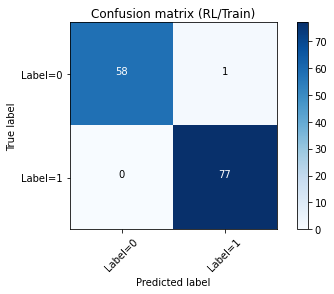

In [260]:
#Matrix de confusion 
cnf_matrix_LR_train = confusion_matrix(y_train, ypred_train, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_train, ypred_train))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_LR_train, classes=['Label=0','Label=1'],normalize= False,  title='Confusion matrix (RL/Train)')

##### données de test

In [261]:
#jaccard index
print('Label 0 =',jaccard_score(y_test, ypred,pos_label=0))
print('Label 1 =',jaccard_score(y_test, ypred,pos_label=1))

Label 0 = 0.9166666666666666
Label 1 = 0.9565217391304348


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.96      0.98        23

    accuracy                           0.97        34
   macro avg       0.96      0.98      0.97        34
weighted avg       0.97      0.97      0.97        34

Confusion matrix, without normalization
[[11  0]
 [ 1 22]]


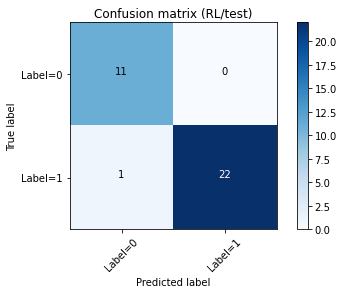

In [262]:
#Matrix de confusion 
cnf_matrix_LR = confusion_matrix(y_test, ypred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, ypred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_LR, classes=['Label=0','Label=1'],normalize= False,  title='Confusion matrix (RL/test)')

#### DataFrame 2 (Scaled)

##### données d'apprentissage

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        77

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136

Confusion matrix, without normalization
[[59  0]
 [ 0 77]]


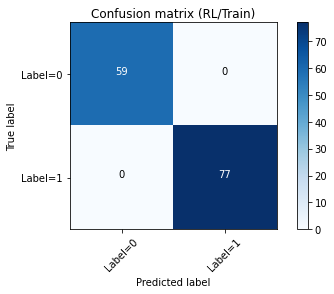

In [263]:
#Matrix de confusion 
cnf_matrix_LR_train = confusion_matrix(y_train, ypred_train_scaled, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_train, ypred_train_scaled))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_LR_train, classes=['Label=0','Label=1'],normalize= False,  title='Confusion matrix (RL/Train)')

##### données de test

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.96      0.98        23

    accuracy                           0.97        34
   macro avg       0.96      0.98      0.97        34
weighted avg       0.97      0.97      0.97        34

Confusion matrix, without normalization
[[11  0]
 [ 1 22]]


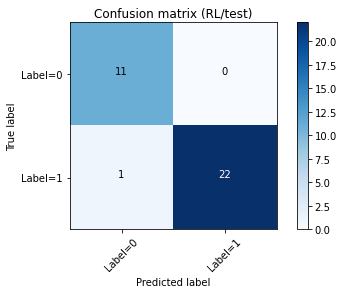

In [264]:
#Matrix de confusion 
cnf_matrix_LR = confusion_matrix(y_test, ypred_scaled, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, ypred_scaled))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_LR, classes=['Label=0','Label=1'],normalize= False,  title='Confusion matrix (RL/test)')

### 📌6.1.3 Création du programme de détection

In [265]:
df_new = pd.read_csv('example.csv')
df_new

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [266]:
X_new = df_new.iloc[:,1:6]
y_new = df_new.iloc[:,6:]

In [267]:
ypred_new = pipe.predict(X_new)
ypred_new_prob = pipe.predict_proba(X_new)

C:\Users\pouri\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\pouri\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [268]:
def prediction(x1, y1):
    
    y_new_val = np.asarray(y1)
    ypred_new = pipe.predict(x1)
    ypred_new_prob = pipe.predict_proba(x1)          
                    
    print('<0 = False , 1 = True>')
    for i in range(0,len(x1)):
        print('{}- Le billet id {} est {} avec la probabilité de {} pourcents'.format(i+1,y_new_val[i,0],ypred_new[i],ypred_new_prob[i] ))   
       #ypred_new[i]

In [269]:
prediction(X_new,y_new)

<0 = False , 1 = True>
1- Le billet id A_1 est 0 avec la probabilité de [0.97 0.03] pourcents
2- Le billet id A_2 est 0 avec la probabilité de [1. 0.] pourcents
3- Le billet id A_3 est 0 avec la probabilité de [0.99 0.01] pourcents
4- Le billet id A_4 est 1 avec la probabilité de [0.06 0.94] pourcents
5- Le billet id A_5 est 1 avec la probabilité de [0. 1.] pourcents


C:\Users\pouri\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\pouri\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
